In [1]:
import pandas as pd
df = pd.read_csv('health_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.shape

(1338, 7)

In [6]:
df['smoker']=df['smoker'].astype('category')



In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['smoker']=le.fit_transform(df['smoker'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [20]:
dff=df.drop('sex',axis=1)

In [21]:
dff.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,southwest,16884.92400
1,18,33.770,1,0,southeast,1725.55230
2,28,33.000,3,0,southeast,4449.46200
3,33,22.705,0,0,northwest,21984.47061
4,32,28.880,0,0,northwest,3866.85520


In [27]:
df2=df.drop('region',axis=1)

In [29]:
df2.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,1,16884.92400
1,18,male,33.770,1,0,1725.55230
2,28,male,33.000,3,0,4449.46200
3,33,male,22.705,0,0,21984.47061
4,32,male,28.880,0,0,3866.85520


In [30]:
df3=df2.drop('sex',axis=1)

In [31]:
df3.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [35]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
sca_df3=ms.fit_transform(df3)

In [36]:
sca_df3

array([[0.02173913, 0.3212268 , 0.        , 1.        , 0.25161076],
       [0.        , 0.47914985, 0.2       , 0.        , 0.00963595],
       [0.2173913 , 0.45843422, 0.6       , 0.        , 0.05311516],
       ...,
       [0.        , 0.56201238, 0.        , 0.        , 0.00810808],
       [0.06521739, 0.26472962, 0.        , 0.        , 0.01414352],
       [0.93478261, 0.35270379, 0.        , 1.        , 0.44724873]])

In [37]:
sca_df3=pd.DataFrame(sca_df3)

In [39]:
sca_df3.head()

,0,1,2,3,4
0,0.021739,0.321227,0.0,1.0,0.251611
1,0.000000,0.479150,0.2,0.0,0.009636
2,0.217391,0.458434,0.6,0.0,0.053115
3,0.326087,0.181464,0.0,0.0,0.333010
4,0.304348,0.347592,0.0,0.0,0.043816


In [41]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(sca_df3,test_size=0.2)

In [46]:
x=sca_df3.iloc[:,:4].values

In [47]:
x

array([[0.02173913, 0.3212268 , 0.        , 1.        ],
       [0.        , 0.47914985, 0.2       , 0.        ],
       [0.2173913 , 0.45843422, 0.6       , 0.        ],
       ...,
       [0.        , 0.56201238, 0.        , 0.        ],
       [0.06521739, 0.26472962, 0.        , 0.        ],
       [0.93478261, 0.35270379, 0.        , 1.        ]])

In [48]:
y=sca_df3.iloc[:,-1].values

In [49]:
y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn import neighbors


In [52]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.10585659684052895
RMSE value for k=  2 is: 0.10180408016555398
RMSE value for k=  3 is: 0.09367865785828296
RMSE value for k=  4 is: 0.08969123998450133
RMSE value for k=  5 is: 0.08751744071665127
RMSE value for k=  6 is: 0.08679118594708202
RMSE value for k=  7 is: 0.08557591522172345
RMSE value for k=  8 is: 0.0844040880500165
RMSE value for k=  9 is: 0.08447518340863078
RMSE value for k=  10 is: 0.08430650448051331
RMSE value for k=  11 is: 0.08386344474089642
RMSE value for k=  12 is: 0.08390033356502095
RMSE value for k=  13 is: 0.08373124460101707
RMSE value for k=  14 is: 0.08409315547315266
RMSE value for k=  15 is: 0.08385270746594292
RMSE value for k=  16 is: 0.08389964193148146
RMSE value for k=  17 is: 0.08376866358267321
RMSE value for k=  18 is: 0.08373772805967435
RMSE value for k=  19 is: 0.08407838121314187
RMSE value for k=  20 is: 0.08360941570489351


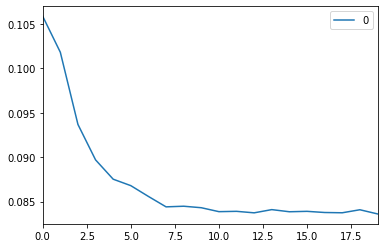

In [54]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [55]:
pred=model.predict(x_test)

In [57]:
pred

array([0.15215939, 0.11402856, 0.13145165, 0.02276318, 0.08971667,
       0.12262154, 0.35980533, 0.28676176, 0.06625191, 0.10323615,
       0.04250711, 0.08276107, 0.06267594, 0.03017681, 0.71915406,
       0.02715872, 0.20661924, 0.0866114 , 0.43218882, 0.16813224,
       0.02015037, 0.36443173, 0.315797  , 0.02611862, 0.64042074,
       0.21576176, 0.13714562, 0.01953626, 0.66005517, 0.17371097,
       0.09138365, 0.19223641, 0.11710224, 0.11668968, 0.1315313 ,
       0.37775603, 0.06989402, 0.02616996, 0.29984311, 0.04485523,
       0.49772711, 0.04844985, 0.14550966, 0.07101163, 0.18866229,
       0.03358391, 0.62858292, 0.55903693, 0.24109248, 0.14136503,
       0.16995211, 0.02779134, 0.17479295, 0.13755808, 0.24653892,
       0.20658418, 0.53426092, 0.07156145, 0.20844024, 0.19170197,
       0.12715537, 0.45934688, 0.03935825, 0.1779338 , 0.1041804 ,
       0.20320312, 0.37204425, 0.09138365, 0.13498544, 0.08918229,
       0.09791924, 0.06242048, 0.17127673, 0.62899992, 0.58213